In [1]:
# from Database import Database
# import sys
# # import multiprocessing as mp
# import pandas as pd
# from collections import Counter
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np
# from scipy.stats.distributions import chi2
# from bioinfokit import analys, visuz
# from scipy.stats import fisher_exact
# import time
# from scipy.special import factorial


# from fisher import pvalue_npy
# from scipy.stats import chi2_contingency
# from scipy.stats import uniform, randint

import sys
# sys.path.append('/groups/umcg-wijmenga/tmp01/projects/lude_vici_2021/rawdata/non-coding-somatic-mutations-in-cancer/Anne/scripts/')
from Database import Database
import pandas as pd
from collections import Counter
# Python program to create
# sparse matrix using csr_matrix()
# Import required package
import numpy as np
from scipy.sparse import csr_matrix
# from matplotlib import pyplot as plt

In [2]:
path_genes = "D:/Hanze_Groningen/STAGE/db/all_genes_new - kopie.tsv"
df_genes = pd.read_csv(path_genes, sep='\t')
print(df_genes.columns)
df_genes

Index(['#hg19.knownCanonical.chrom', 'hg19.knownCanonical.chromStart',
       'hg19.knownCanonical.chromEnd', 'hg19.kgXref.geneSymbol',
       'hg19.knownGene.name', 'hg19.knownGene.chrom', 'hg19.knownGene.strand',
       'hg19.knownGene.txStart', 'hg19.knownGene.txEnd',
       'hg19.knownGene.cdsStart', 'hg19.knownGene.cdsEnd',
       'hg19.knownGene.exonCount', 'hg19.knownGene.exonStarts',
       'hg19.knownGene.exonEnds'],
      dtype='object')


,#hg19.knownCanonical.chrom,hg19.knownCanonical.chromStart,hg19.knownCanonical.chromEnd,hg19.kgXref.geneSymbol,hg19.knownGene.name,hg19.knownGene.chrom,hg19.knownGene.strand,hg19.knownGene.txStart,hg19.knownGene.txEnd,hg19.knownGene.cdsStart,hg19.knownGene.cdsEnd,hg19.knownGene.exonCount,hg19.knownGene.exonStarts,hg19.knownGene.exonEnds
0,chr1,11873,14409,DDX11L1,uc010nxq.1,chr1,+,11873,14409,12189,13639,3,"11873,12594,13402,","12227,12721,14409,"
1,chr1,14361,19759,WASH7P,uc009viu.3,chr1,-,14361,19759,14361,14361,10,"14361,14969,15795,16606,16857,17232,17914,1826...","14829,15038,15947,16765,17055,17742,18061,1836..."
2,chr1,14406,29370,WASH7P,uc009viw.2,chr1,-,14406,29370,14406,14406,7,"14406,16857,17232,17914,18267,24737,29320,","16765,17055,17742,18061,18366,24891,29370,"
3,chr1,34610,36081,FAM138A,uc001aak.3,chr1,-,34610,36081,34610,34610,3,"34610,35276,35720,","35174,35481,36081,"
4,chr1,69090,70008,OR4F5,uc001aal.1,chr1,+,69090,70008,69090,70008,1,"69090,","70008,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31843,chr17_gl000205_random,116622,119732,MGC70870,uc002kgk.4,chr17_gl000205_random,+,116622,119732,116622,116622,1,"116622,","119732,"
31844,chr19_gl000209_random,7909,19472,KIR3DL3,uc010euy.2,chr19_gl000209_random,+,7909,19472,7914,19472,8,"7909,8625,9431,10989,12867,18628,19195,19346,","7948,8661,9716,11289,13161,18733,19248,19472,"
31845,chr19_gl000209_random,21910,36449,KIR2DL2,uc002qts.2,chr19_gl000209_random,+,21910,36449,21939,35938,8,"21910,22881,25353,27167,30730,35046,35610,35761,","21973,22917,25653,27461,30781,35148,35663,36449,"
31846,chr19_gl000209_random,86690,96246,KIR2DL5B,uc002quk.1,chr19_gl000209_random,+,86690,96246,86745,95742,8,"86690,87512,88310,89470,91936,94752,95319,95472,","86779,87548,88595,89764,91987,94857,95372,96246,"


In [ ]:
'hg19.knownGene.txStart', 'hg19.knownGene.txEnd',
       'hg19.knownGene.cdsStart', 'hg19.knownGene.cdsEnd',
       'hg19.knownGene.exonCount', 'hg19.knownGene.exonStarts',
       'hg19.knownGene.exonEnds'

In [3]:
list_tx = df_genes['hg19.knownGene.txEnd'] - df_genes['hg19.knownGene.txStart']
list_cds = df_genes['hg19.knownGene.cdsEnd'] - df_genes['hg19.knownGene.cdsStart']
count_exon = list(df_genes['hg19.knownGene.exonCount'])


In [38]:
print(max(list_cds))
print(min(list_cds))
sum(list_cds) / len(list_cds)

2307732
0


31280.278604621955

In [40]:
sum(count_exon)

239673

In [41]:
df_genes['X'] = df_genes['hg19.knownGene.exonStarts'].apply(lambda x: x.strip(',').split(','))
import itertools
list2d = list(df_genes['X'])
merged_X = list(itertools.chain(*list2d))


In [42]:
df_genes['Y'] = df_genes['hg19.knownGene.exonEnds'].apply(lambda x: x.strip(',').split(','))
import itertools
list2dy = list(df_genes['Y'])
merged_y = list(itertools.chain(*list2dy))
len(merged_y)
merged_y


['12227',
 '12721',
 '14409',
 '14829',
 '15038',
 '15947',
 '16765',
 '17055',
 '17742',
 '18061',
 '18369',
 '18554',
 '19759',
 '16765',
 '17055',
 '17742',
 '18061',
 '18366',
 '24891',
 '29370',
 '35174',
 '35481',
 '36081',
 '70008',
 '139696',
 '139847',
 '140566',
 '321115',
 '321207',
 '322228',
 '324345',
 '326938',
 '328439',
 '368597',
 '420296',
 '421258',
 '421839',
 '566115',
 '566155',
 '566263',
 '568913',
 '622034',
 '665184',
 '668744',
 '670994',
 '668479',
 '668541',
 '671885',
 '671947',
 '674404',
 '675415',
 '675566',
 '678730',
 '679736',
 '700627',
 '701767',
 '703993',
 '705092',
 '708487',
 '709660',
 '714068',
 '762902',
 '763155',
 '764484',
 '783186',
 '787490',
 '788146',
 '794826',
 '804055',
 '810535',
 '812182',
 '846853',
 '850328',
 '853100',
 '853555',
 '854295',
 '854817',
 '861180',
 '861393',
 '865716',
 '866469',
 '871276',
 '874509',
 '874840',
 '876686',
 '877631',
 '877868',
 '878438',
 '878757',
 '879188',
 '879961',
 '880180',
 '880526',
 

In [43]:
dif = np.array(list(map(int, merged_y))) - np.array(list(map(int, merged_X)))
print(max(dif))
print(min(dif))
sum(dif) / len(dif)

205012
1


318.2352037985088

In [44]:
path_UCNE = "E:/cluster stage/GREEN_DB/2022-04-13_GRCh37_UCNE.bed.gz"
path_TFBS = "E:/cluster stage/GREEN_DB/2022-04-13_GRCh37_TFBS.merged.bed.gz"
path_DNase = "E:/cluster stage/GREEN_DB/2022-04-13_GRCh37_DNase.merged.bed.gz"


In [47]:
df = pd.read_csv(path_UCNE, sep='\t', compression='gzip')
print(df.columns)
print(len(df))
df['dif'] = df['End'] - df['Start']
dif = list(df['dif'])
print(max(dif))
print(min(dif))
sum(dif) / len(dif)

Index(['#Chromosome', 'Start', 'End', 'regionID'], dtype='object')
4351
1418
199


325.2452309813836

In [2]:
path_db = "D:/Hanze_Groningen/STAGE/db_laatste_copy.db" #"/groups/umcg-wijmenga/tmp01/projects/lude_vici_2021/rawdata/cancer_data/new_db/copydb_L.db"  # /groups/umcg-wijmenga/tmp01/projects/lude_vici_2021/rawdata/cancer_data/new_db/copydatabase_C.db
# Database connection
db = Database(path_db)

df = pd.read_sql('''SELECT project.cancer, sum_dosage_GT.donor_project_ID, project.project_ID,
                        sum_dosage_GT.donor_ID, sum_dosage_GT.snp_ID, sum_dosage_GT.GT, sum_dosage_GT.GT2,
                        snp.chr, snp.pos_start, snp.pos_end , snp.DNase, snp.TFBS, snp.UCNE
                FROM project, sum_dosage_GT, snp 
                WHERE sum_dosage_GT.snp_ID=snp.ID AND 
                            sum_dosage_GT.donor_project_ID = project.ID AND 
                            (sum_dosage_GT.GT2 = 1 OR sum_dosage_GT.GT2 = 2) AND 
                            sum_dosage_GT.total_read_count_sum >= 33 ;''', db.mydb_connection)
df

,cancer,donor_project_ID,project_ID,donor_ID,snp_ID,GT,GT2,chr,pos_start,pos_end,DNase,TFBS,UCNE
0,Head and neck,1,ORCA-IN,1,2,1,1,10,105977264,105977264,0,0,0
1,Head and neck,1,ORCA-IN,1,13,1,1,2,220235789,220235789,0,0,0
2,Head and neck,1,ORCA-IN,1,17,1,1,15,25954365,25954365,1,0,0
3,Head and neck,1,ORCA-IN,1,23,1,1,5,117513900,117513900,0,0,0
4,Head and neck,1,ORCA-IN,1,31,1,1,8,55363870,55363870,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982581,Mesenchymal,43,SARC-US,2996,21812248,1,1,17,46607840,46607840,1,1,0
9982582,Mesenchymal,43,SARC-US,2996,21812249,1,1,15,55919246,55919246,0,0,0
9982583,Mesenchymal,43,SARC-US,2996,21812253,1,1,17,42926715,42926715,1,1,0
9982584,Mesenchymal,43,SARC-US,2996,21812255,1,1,14,105177455,105177455,0,1,0


In [5]:
all_donors = list(set(df['donor_ID']))
all_snps = list(set(df['snp_ID']))

In [4]:
print(len(all_snps))

9638808


In [15]:
# df = df.sort_values(by=['cancer']).reset_index()
# df['index'] = df.index
df

,level_0,index,cancer,donor_project_ID,project_ID,donor_ID,snp_ID,GT,GT2,chr,pos_start,pos_end,DNase,TFBS,UCNE
0,0,0,Bladder,22,BLCA-US,1099,3256902,1,1,7,43484652,43484652,1,1,0
1,2283,1,Bladder,22,BLCA-US,1104,3258113,1,1,19,37619520,37619520,0,1,0
2,2284,2,Bladder,22,BLCA-US,1104,3258111,1,1,2,105890144,105890144,0,0,0
3,2285,3,Bladder,22,BLCA-US,1104,3258110,1,1,X,152858159,152858159,0,0,0
4,2286,4,Bladder,22,BLCA-US,1104,3258109,1,1,5,137722024,137722028,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982581,9842932,9982581,Uterus,10,UTCA-FR,619,1516118,1,1,3,188087965,188087965,1,1,0
9982582,9842933,9982582,Uterus,10,UTCA-FR,619,1516110,1,1,3,139147164,139147164,0,1,0
9982583,9842934,9982583,Uterus,10,UTCA-FR,619,1516111,1,1,8,73346451,73346451,0,0,0
9982584,9842924,9982584,Uterus,10,UTCA-FR,619,1516144,1,1,13,37393751,37393751,1,1,0


In [4]:
df_select_cn = df[df['project_ID'] == 'COCA-CN']
donor_list_CN = list(set(df_select_cn['index']))
donors = pd.read_sql('''SELECT donor_ID, ID
                FROM donor ''', db.mydb_connection)
donors = donors[donors['ID'].isin(donor_list_CN)]
print(list(donors['ID']))
print(len(list(donors['ID'])))


KeyError: 'index'

In [ ]:
df_select_cn = df[df['cancer'] == 'Colorectal']
donor_list_CN = list(set(df_select_cn['index']))
donors = pd.read_sql('''SELECT donor_ID, ID
                FROM donor ''', db.mydb_connection)
donors = donors[donors['ID'].isin(donor_list_CN)]
print(list(donors['ID']))
print(len(list(donors['ID'])))


[951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 2330, 2331, 2332, 2333, 2334, 2335, 2336, 2337, 2338, 2339, 2340, 2341, 2342, 2343, 2344, 2345, 2346, 2347, 2348, 2349, 2350, 2351, 2352, 2353, 2354, 2355, 2356, 2357, 2358, 2359, 2360, 2361, 2362, 2363, 2364, 2365, 2366, 2367, 2368, 2369, 2370, 2371, 2372, 2373, 2374, 2375, 2376, 2377, 2378, 2379, 2380, 2381, 2382, 2383, 2384, 2385, 2386, 2387, 2388, 2389, 2390, 2391, 2392, 2393, 2394, 2395, 2396, 2397, 2398, 2399, 2400, 2401, 2402, 2403]
90


In [6]:
snp_DF = pd.DataFrame(columns=['snp_IDs_uni'])
snp_DF['snp_IDs_uni'] = all_snps
snp_DF.to_csv('D:/Hanze_Groningen/STAGE/snps_after_filtering_unique.tsv', sep='\t', encoding='utf-8', index=False)

In [24]:
donors = pd.read_sql('''SELECT donor_ID, ID
                FROM donor ''', db.mydb_connection)
donors = donors[donors['ID'].isin(all_donors)]
print(list(donors['donor_ID']))

['DO218012', 'DO217950', 'DO217836', 'DO218075', 'DO218280', 'DO218554', 'DO218697', 'DO218180', 'DO218034', 'DO218462', 'DO218211', 'DO218773', 'DO218306', 'DO46346', 'DO46400', 'DO46458', 'DO46448', 'DO46453', 'DO46523', 'DO46576', 'DO46473', 'DO46386', 'DO46402', 'DO46493', 'DO46326', 'DO46330', 'DO46606', 'DO46336', 'DO46388', 'DO46503', 'DO46416', 'DO46356', 'DO46556', 'DO46546', 'DO46340', 'DO46350', 'DO46412', 'DO46586', 'DO46420', 'DO46362', 'DO46394', 'DO46331', 'DO46398', 'DO46498', 'DO46478', 'DO46551', 'DO46597', 'DO46568', 'DO46408', 'DO46404', 'DO46438', 'DO46483', 'DO46533', 'DO46588', 'DO46327', 'DO46325', 'DO46593', 'DO46376', 'DO46384', 'DO46581', 'DO46378', 'DO46392', 'DO46354', 'DO46344', 'DO46468', 'DO46333', 'DO46513', 'DO46366', 'DO46329', 'DO46571', 'DO46611', 'DO46348', 'DO46334', 'DO46518', 'DO46561', 'DO46528', 'DO46342', 'DO46352', 'DO46372', 'DO46382', 'DO46488', 'DO46360', 'DO46443', 'DO46566', 'DO46368', 'DO46436', 'DO46591', 'DO46332', 'DO46542', 'DO4638

In [6]:
df2 = pd.read_sql('''SELECT project.cancer, sum_dosage_GT.donor_project_ID, project.project_ID,
                        sum_dosage_GT.donor_ID, sum_dosage_GT.snp_ID, sum_dosage_GT.GT, sum_dosage_GT.GT2,
                        snp.chr, snp.pos_start, snp.pos_end , snp.DNase, snp.TFBS, snp.UCNE, snp.AF,
                        snp.in_transcript, snp.in_coding, snp.in_exon, snp.before_gene, snp.after_gene, snp.ID_eQTL,
                        snp.eQTL, snp.close_eQTL_3000
                FROM project, sum_dosage_GT, snp 
                WHERE sum_dosage_GT.snp_ID=snp.ID AND 
                            sum_dosage_GT.donor_project_ID = project.ID AND 
                            (sum_dosage_GT.GT2 = 1 OR sum_dosage_GT.GT2 = 2) AND 
                            sum_dosage_GT.total_read_count_sum >= 33 ;''', db.mydb_connection)
df2

,cancer,donor_project_ID,project_ID,donor_ID,snp_ID,GT,GT2,chr,pos_start,pos_end,...,UCNE,AF,in_transcript,in_coding,in_exon,before_gene,after_gene,ID_eQTL,eQTL,close_eQTL_3000
0,Head and neck,1,ORCA-IN,1,2,1,1,10,105977264,105977264,...,0,None,1,1,0,1,0,None,0,0
1,Head and neck,1,ORCA-IN,1,13,1,1,2,220235789,220235789,...,0,None,0,0,0,0,0,None,0,0
2,Head and neck,1,ORCA-IN,1,17,1,1,15,25954365,25954365,...,0,None,1,1,0,0,0,None,0,0
3,Head and neck,1,ORCA-IN,1,23,1,1,5,117513900,117513900,...,0,None,0,0,0,0,0,None,0,0
4,Head and neck,1,ORCA-IN,1,31,1,1,8,55363870,55363870,...,0,None,0,0,0,0,0,None,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982581,Mesenchymal,43,SARC-US,2996,21812248,1,1,17,46607840,46607840,...,0,None,1,1,1,0,0,None,0,0
9982582,Mesenchymal,43,SARC-US,2996,21812249,1,1,15,55919246,55919246,...,0,None,1,1,1,0,0,None,0,0
9982583,Mesenchymal,43,SARC-US,2996,21812253,1,1,17,42926715,42926715,...,0,None,1,1,1,1,0,None,0,0
9982584,Mesenchymal,43,SARC-US,2996,21812255,1,1,14,105177455,105177455,...,0,None,1,1,1,0,0,None,0,0


In [3]:
df.columns

Index(['cancer', 'donor_project_ID', 'project_ID', 'donor_ID', 'snp_ID', 'GT',
       'GT2', 'chr', 'pos_start', 'pos_end', 'DNase', 'TFBS', 'UCNE'],
      dtype='object')

In [17]:
print(list_test.sort())

None


In [19]:
x = ['CMDI-UK - 30', 'WT-US - 66', 'COCA-CN - 30', 'LICA-FR - 49', 'OV-US - 42', 'HNSC-US - 43', 'LINC-JP - 31', 'BTCA-SG - 71', 'CESC-US - 20', 'READ-US - 16', 'UTCA-FR - 20', 'ORCA-IN - 13', 'BOCA-FR - 95', 'BRCA-FR - 72', 'SARC-US - 34', 'AML-US - 107', 'KIRP-US - 33', 'BRCA-EU - 78', 'OV-AU - 93', 'BOCA-UK - 64', 'LIHC-US - 54', 'GACA-CN - 35', 'BRCA-US - 91', 'CLLE-ES - 95', 'LGG-US - 18', 'UCEC-US - 51', 'LAML-KR - 29', 'LIAD-FR - 5', 'ALL-US - 101', 'KICH-US - 45', 'DLBC-US - 7', 'LIRI-JP - 258', 'THCA-US - 46', 'BLCA-US - 23', 'COAD-US - 44', 'RECA-EU - 95', 'BRCA-UK - 45', 'KIRC-US - 37', 'LICA-CN - 112', 'GBM-US - 40'].sort()
x

In [15]:
list_test = list()
for project_id in list(set(df['project_ID'])):
    df_project = df[df['project_ID'] == project_id]
    print(f'{project_id} - {len(set(df_project["donor_ID"]))}')
    x = f'{project_id} - {len(set(df_project["donor_ID"]))}'
    list_test.append(x)

print(list_test)

CMDI-UK - 30
WT-US - 66
COCA-CN - 30
LICA-FR - 49
OV-US - 42
HNSC-US - 43
LINC-JP - 31
BTCA-SG - 71
CESC-US - 20
READ-US - 16
UTCA-FR - 20
ORCA-IN - 13
BOCA-FR - 95
BRCA-FR - 72
SARC-US - 34
AML-US - 107
KIRP-US - 33
BRCA-EU - 78
OV-AU - 93
BOCA-UK - 64
LIHC-US - 54
GACA-CN - 35
BRCA-US - 91
CLLE-ES - 95
LGG-US - 18
UCEC-US - 51
LAML-KR - 29
LIAD-FR - 5
ALL-US - 101
KICH-US - 45
DLBC-US - 7
LIRI-JP - 258
THCA-US - 46
BLCA-US - 23
COAD-US - 44
RECA-EU - 95
BRCA-UK - 45
KIRC-US - 37
LICA-CN - 112
GBM-US - 40
['CMDI-UK - 30', 'WT-US - 66', 'COCA-CN - 30', 'LICA-FR - 49', 'OV-US - 42', 'HNSC-US - 43', 'LINC-JP - 31', 'BTCA-SG - 71', 'CESC-US - 20', 'READ-US - 16', 'UTCA-FR - 20', 'ORCA-IN - 13', 'BOCA-FR - 95', 'BRCA-FR - 72', 'SARC-US - 34', 'AML-US - 107', 'KIRP-US - 33', 'BRCA-EU - 78', 'OV-AU - 93', 'BOCA-UK - 64', 'LIHC-US - 54', 'GACA-CN - 35', 'BRCA-US - 91', 'CLLE-ES - 95', 'LGG-US - 18', 'UCEC-US - 51', 'LAML-KR - 29', 'LIAD-FR - 5', 'ALL-US - 101', 'KICH-US - 45', 'DLBC-US - 7', 

In [5]:
for cancer in list(set(df['cancer'])):
    df_cancer = df[df['cancer'] == cancer]
    print(f'{cancer} - {len(set(df_cancer["donor_ID"]))}')

Breast - 286
Head and neck - 102
Colorectal - 90
Liver - 509
Bladder - 23
Blood - 369
Gall Bladder - 71
Kidney - 276
Brain - 58
Uterus - 71
Stomach - 35
Bone - 159
Cervix - 20
Mesenchymal - 34
Ovary - 135


In [21]:
df2.columns

Index(['cancer', 'donor_project_ID', 'project_ID', 'donor_ID', 'snp_ID', 'GT',
       'GT2', 'chr', 'pos_start', 'pos_end', 'DNase', 'TFBS', 'UCNE', 'AF',
       'in_transcript', 'in_coding', 'in_exon', 'before_gene', 'after_gene',
       'ID_eQTL', 'eQTL', 'close_eQTL_3000'],
      dtype='object')

In [22]:
select_columns = ['DNase', 'TFBS', 'UCNE', 'AF',
       'in_transcript', 'in_coding', 'in_exon', 
       'before_gene', 'after_gene',
       'ID_eQTL', 'eQTL', 'close_eQTL_3000']

In [39]:
df_list = [df2, breast, nonbreast]

for i in df_list:
    print(f'true: {len(i["snp_ID"])}')
    print(f'true UNIEK: {len(set(i["snp_ID"]))}')

        # df_false = i[i[col] == 0]
        # print(f'false: {len(df_false["snp_ID"])}')
        # print(f'false UNIEK: {len(set(df_false["snp_ID"]))}')
        # print()



true: 9982586
true UNIEK: 9638808
true: 570320
true UNIEK: 570048
true: 9412266
true UNIEK: 9070639


In [72]:
breast = df2[df2['cancer']=='Breast']
nonbreast = df2[df2['cancer']!='Breast']

In [73]:
print(len(list(set(df2['donor_ID']))))
print(len(list(set(breast['donor_ID']))))
print(len(list(set(nonbreast['donor_ID']))))


2238
286
1952


In [74]:
286/2238*100

12.779267202859696

In [75]:
1952/2238*100

87.2207327971403

In [37]:
df_list = [df2, breast, nonbreast]

for i in df_list:
    print('YOOOO')
    for col in ['close_eQTL_3000']:
        print(f'--- {col}')
        df_true = i[i[col] == 1]
        print(f'true: {len(df_true["snp_ID"])}')
        print(f'true UNIEK: {len(set(df_true["snp_ID"]))}')

        # df_false = i[i[col] == 0]
        # print(f'false: {len(df_false["snp_ID"])}')
        # print(f'false UNIEK: {len(set(df_false["snp_ID"]))}')
        # print()



YOOOO
--- close_eQTL_3000
true: 250221
true UNIEK: 226880
YOOOO
--- close_eQTL_3000
true: 15647
true UNIEK: 15636
YOOOO
--- close_eQTL_3000
true: 234574
true UNIEK: 211302


In [5]:
columns_keep = ['cancer', 'donor_ID', 'snp_ID', 'GT', 'GT2']
df_whole = df[columns_keep]
df_breast = df[df['cancer']=='Breast'][columns_keep]
df_nonbreast = df[df['cancer']!='Breast'][columns_keep]

In [6]:
df_whole

,cancer,donor_ID,snp_ID,GT,GT2
0,Head and neck,1,2,1,1
1,Head and neck,1,13,1,1
2,Head and neck,1,17,1,1
3,Head and neck,1,23,1,1
4,Head and neck,1,31,1,1
...,...,...,...,...,...
9982581,Mesenchymal,2996,21812248,1,1
9982582,Mesenchymal,2996,21812249,1,1
9982583,Mesenchymal,2996,21812253,1,1
9982584,Mesenchymal,2996,21812255,1,1


In [ ]:
# Whole


In [61]:
x = [570320, 230237, 183079, 17989, 340083, 11249, 11304, 317, 149318, 91540, 0, 15647]
y = np.array(x)/286
y

array([1.99412587e+03, 8.05024476e+02, 6.40136364e+02, 6.28986014e+01,
       1.18910140e+03, 3.93321678e+01, 3.95244755e+01, 1.10839161e+00,
       5.22090909e+02, 3.20069930e+02, 0.00000000e+00, 5.47097902e+01])

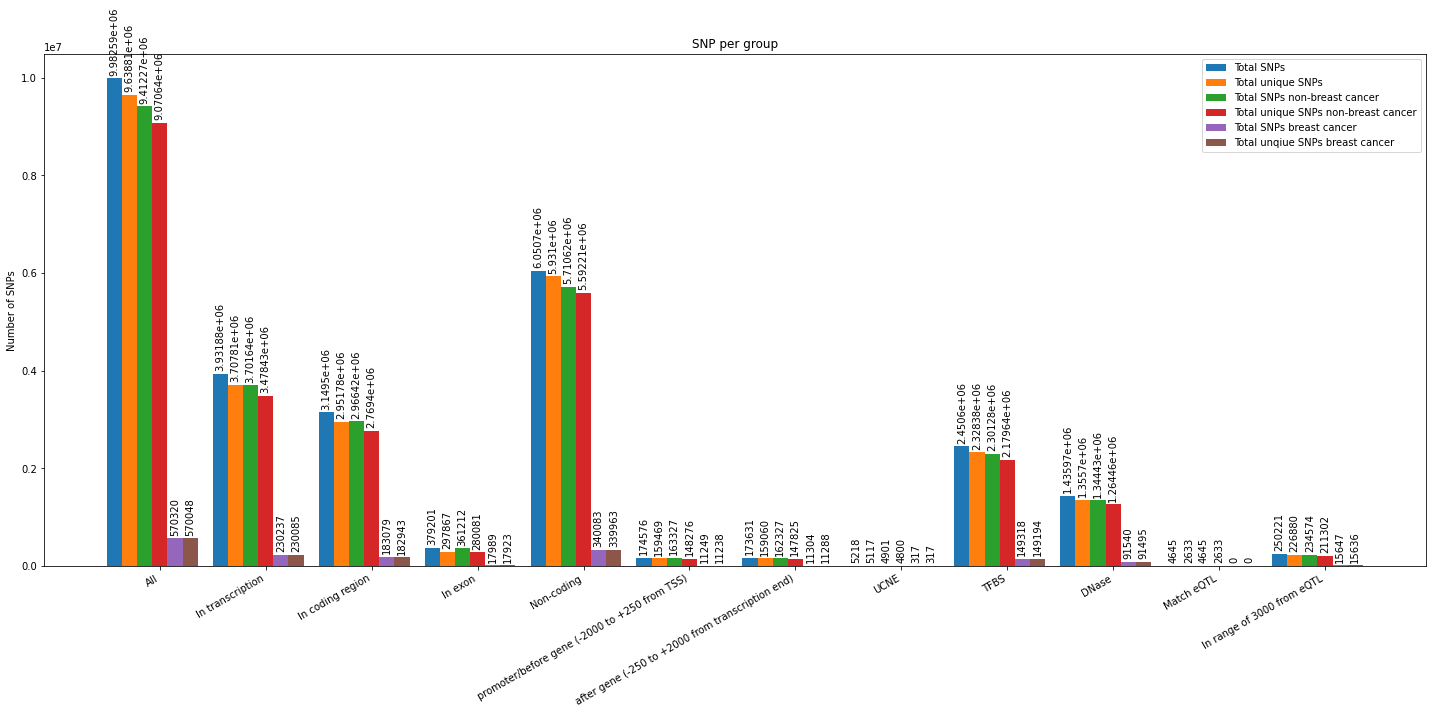

In [4]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['All', 'In transcription', 'In coding region', 'In exon', 'Non-coding', 'promoter/before gene (-2000 to +250 from TSS)', 'after gene (-250 to +2000 from transcription end)',
         'UCNE', 'TFBS', 'DNase', 'Match eQTL', 'In range of 3000 from eQTL']

Total_snps = [9982586, 3931881, 3149495, 379201, 6050705, 174576, 173631, 5218, 2450599, 1435969, 4645, 250221]
Total_unqiue = [9638808, 3707807, 2951776, 297867, 5931001, 159469, 159060, 5117, 2328383, 1355697, 2633, 226880]
breast = [570320, 230237, 183079, 17989, 340083, 11249, 11304, 317, 149318, 91540, 0, 15647]
breast_unique = [570048, 230085, 182943, 17923, 339963, 11238, 11288, 317, 149194, 91495, 0, 15636]
non_breast = [9412266, 3701644, 2966416, 361212, 5710622, 163327, 162327, 4901, 2301281, 1344429, 4645, 234574]
non_breast_unqiue = [9070639, 3478430, 2769400, 280081, 5592209, 148276, 147825, 4800, 2179644, 1264456, 2633, 211302]


x = np.arange(len(labels))  # the label locations
width = 1/7  # the width of the bars

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(x - (3 * width), Total_snps, width, label='Total SNPs')
rects2 = ax.bar(x - (2 * width), Total_unqiue, width, label='Total unique SNPs')
rects3 = ax.bar(x - (1 * width), non_breast, width, label='Total SNPs non-breast cancer')
rects4 = ax.bar(x + (0 * width), non_breast_unqiue, width, label='Total unique SNPs non-breast cancer')
rects5 = ax.bar(x + (1 * width), breast, width, label='Total SNPs breast cancer')
rects6 = ax.bar(x + (2 * width), breast_unique, width, label='Total unqiue SNPs breast cancer')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of SNPs')
ax.set_title('SNP per group')
ax.set_xticks(x, labels)
plt.xticks(rotation=30, ha='right')
ax.legend()

ax.bar_label(rects1, padding=3, rotation=90)
ax.bar_label(rects2, padding=3, rotation=90)
ax.bar_label(rects3, padding=3, rotation=90)
ax.bar_label(rects4, padding=3, rotation=90)
ax.bar_label(rects5, padding=3, rotation=90)
ax.bar_label(rects6, padding=3, rotation=90)




fig.tight_layout()
plt.show()







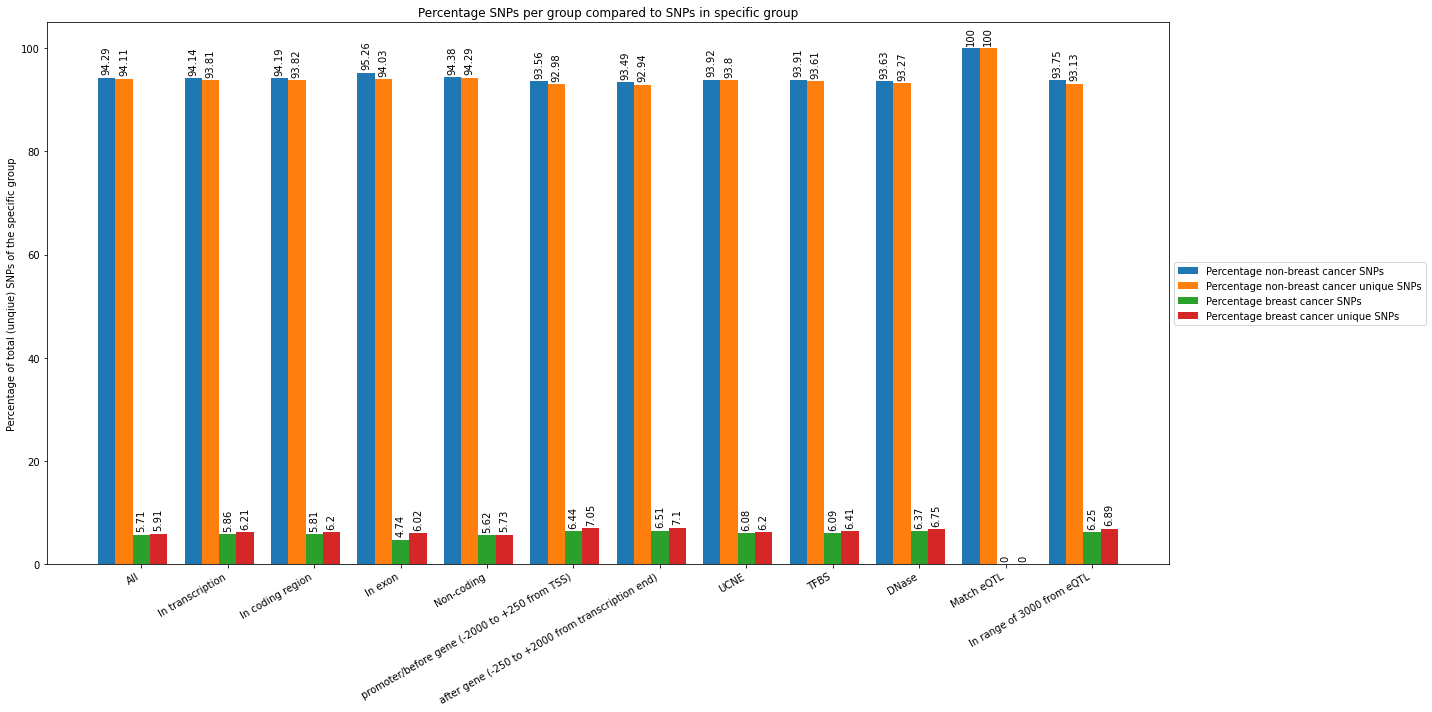

In [14]:
Total_snps = [9982586, 3931881, 3149495, 379201, 6050705, 174576, 173631, 5218, 2450599, 1435969, 4645, 250221]
Total_unqiue = [9638808, 3707807, 2951776, 297867, 5931001, 159469, 159060, 5117, 2328383, 1355697, 2633, 226880]
breast = [570320, 230237, 183079, 17989, 340083, 11249, 11304, 317, 149318, 91540, 0, 15647]
breast_unique = [570048, 230085, 182943, 17923, 339963, 11238, 11288, 317, 149194, 91495, 0, 15636]
non_breast = [9412266, 3701644, 2966416, 361212, 5710622, 163327, 162327, 4901, 2301281, 1344429, 4645, 234574]
non_breast_unqiue = [9070639, 3478430, 2769400, 280081, 5592209, 148276, 147825, 4800, 2179644, 1264456, 2633, 211302]

breast_per = np.round((np.array(breast)/np.array(Total_snps))*100, 2)
breast_uni_per = np.round((np.array(breast_unique)/np.array(Total_unqiue))*100, 2)

non_breast_per = np.round((np.array(non_breast)/np.array(Total_snps))*100, 2)
non_breast_uni_per = np.round((np.array(non_breast_unqiue)/np.array(Total_unqiue))*100, 2)


x = np.arange(len(labels))  # the label locations
width = 1/5  # the width of the bars

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(x - (2 * width), non_breast_per, width, label='Percentage non-breast cancer SNPs')
rects2 = ax.bar(x - (1 * width), non_breast_uni_per, width, label='Percentage non-breast cancer unique SNPs')
rects3 = ax.bar(x + (0 * width), breast_per, width, label='Percentage breast cancer SNPs')
rects4 = ax.bar(x + (1 * width), breast_uni_per, width, label='Percentage breast cancer unique SNPs')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage of total (unqiue) SNPs of the specific group')
ax.set_title('Percentage SNPs per group compared to SNPs in specific group')
ax.set_xticks(x, labels)
plt.xticks(rotation=30, ha='right')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.bar_label(rects1, padding=3, rotation=90)
ax.bar_label(rects2, padding=3, rotation=90)
ax.bar_label(rects3, padding=3, rotation=90)
ax.bar_label(rects4, padding=3, rotation=90)

fig.tight_layout()
plt.show()

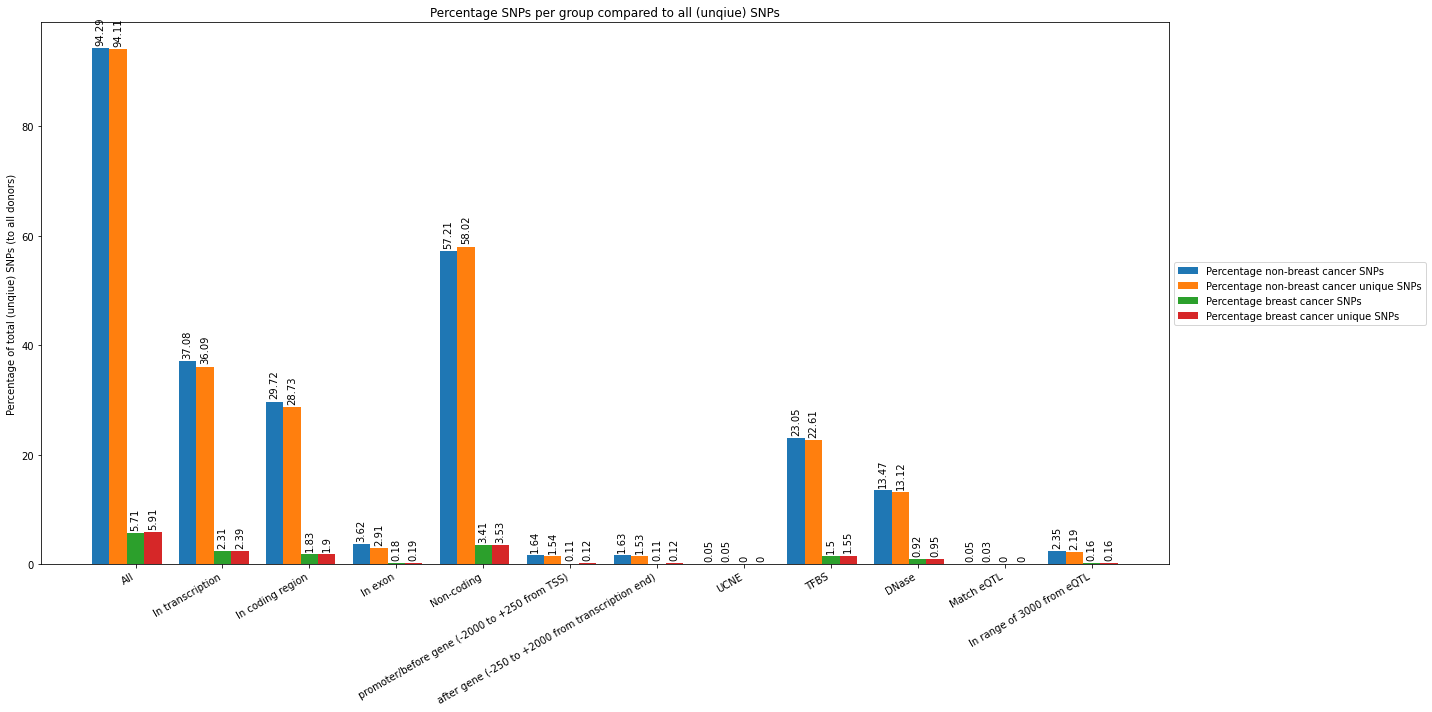

In [13]:
Total_snps = [9982586, 3931881, 3149495, 379201, 6050705, 174576, 173631, 5218, 2450599, 1435969, 4645, 250221]
Total_unqiue = [9638808, 3707807, 2951776, 297867, 5931001, 159469, 159060, 5117, 2328383, 1355697, 2633, 226880]
breast = [570320, 230237, 183079, 17989, 340083, 11249, 11304, 317, 149318, 91540, 0, 15647]
breast_unique = [570048, 230085, 182943, 17923, 339963, 11238, 11288, 317, 149194, 91495, 0, 15636]
non_breast = [9412266, 3701644, 2966416, 361212, 5710622, 163327, 162327, 4901, 2301281, 1344429, 4645, 234574]
non_breast_unqiue = [9070639, 3478430, 2769400, 280081, 5592209, 148276, 147825, 4800, 2179644, 1264456, 2633, 211302]

breast_per = np.round((np.array(breast)/9982586)*100, 2)
breast_uni_per = np.round((np.array(breast_unique)/9638808)*100, 2)

non_breast_per = np.round((np.array(non_breast)/9982586)*100, 2)
non_breast_uni_per = np.round((np.array(non_breast_unqiue)/9638808)*100, 2)


x = np.arange(len(labels))  # the label locations
width = 1/5  # the width of the bars

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(x - (2 * width), non_breast_per, width, label='Percentage non-breast cancer SNPs')
rects2 = ax.bar(x - (1 * width), non_breast_uni_per, width, label='Percentage non-breast cancer unique SNPs')
rects3 = ax.bar(x + (0 * width), breast_per, width, label='Percentage breast cancer SNPs')
rects4 = ax.bar(x + (1 * width), breast_uni_per, width, label='Percentage breast cancer unique SNPs')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage of total (unqiue) SNPs (to all donors)')
ax.set_title('Percentage SNPs per group compared to all (unqiue) SNPs')
ax.set_xticks(x, labels)
plt.xticks(rotation=30, ha='right')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.bar_label(rects1, padding=3, rotation=90)
ax.bar_label(rects2, padding=3, rotation=90)
ax.bar_label(rects3, padding=3, rotation=90)
ax.bar_label(rects4, padding=3, rotation=90)

fig.tight_layout()
plt.show()

In [31]:
def layer_run(df_variant, name_variant):    
    header_file = 'filter\tgene\tchr\tstart_position_regio\tend_position_regio\t#snp_unique\tsnp_list\t#donors_all' \
                '\tdonor_count\tcancer_count\n'    
    # Make file
    f = open(f'D:/Hanze_Groningen/STAGE/{name_variant}_num_snps_ALL_TEST.tsv', 'w')
    f.write(header_file)
    for index, row in df_variant.iterrows():
        print(index)
        x = df[(df['chr']==row['#Chromosome']) & (df['pos_start']>=row['Start']) & (df['pos_end']<=row['End'])]
        if len(x) > 0:
            print(set(x[name_variant]))
            donor_list = list(x['donor_ID'])
            donor_count = dict(Counter(donor_list))
            cancer_list = list(x['cancer'])
            cancer_count = dict(Counter(cancer_list))
            f.write(str(33) + '\t' + str(row['#Chromosome']) + '\t' + str(row['Start']) + '\t' + str(row['End']) + '\t' + str(
            len(x['snp_ID'])) + '\t' + ','.join(map(str, list(x['snp_ID']))) + '\t' + str(len(donor_list)) + '\t' + str(
            donor_count) + '\t' + str(cancer_count) + '\n')
        else:
            f.write(str(33) + '\t' + str(row['#Chromosome']) + '\t' + str(row['Start']) + '\t' + str(row['End']) + '\t-\t-\t-\t-\t-\n')

    f.close()


In [32]:
# DNase
path_file = 'D:/Hanze_Groningen/STAGE/lagen/2022-04-13_GRCh37_DNase.merged.bed.gz'
df_variant = pd.read_csv(path_file, sep='\t', compression='gzip')
df_variant['#Chromosome'] = df_variant['#Chromosome'].str.replace('chr', '')
print(len(df_variant))

1867665


In [33]:
name_variant = 'DNase'
layer_run(df_variant, name_variant)

0
1
{1}
2
{1}
3
4
5
6
7
8
9
{1}
10
{1}
11
12
13
14
15
16
{1}
17
{1}
18
{1}
19
{1}
20
{1}
21
{1}
22
{1}
23
{1}
24
25
26
27
28
29
{1}
30
31
32
33
34
35
36
{1}
37
38
{1}
39
40
{1}
41
42
43
{1}
44
45
{1}
46
{1}
47
48
{1}
49
50
51
52
53
54
{1}
55
56
57
58
59
60
61
62
63
64
65
66
{1}
67
{1}
68
{1}
69
70
71
{1}
72
{1}
73
74
75
76
77
78
79
80
81
{1}
82
{1}
83
84
85
{1}
86
{1}
87
{1}
88
89
90
{1}
91
92
93
94
95
{1}
96
97
98
99
100
101
{1}
102
103
{1}
104
105
106
{1}
107
{1}
108
{1}
109
{1}
110
111
{1}
112
{1}
113
114
{1}
115
{1}
116
{1}
117
118
119
{1}
120
{1}
121
{1}
122
{1}
123
{1}
124
{1}
125
{1}
126
{1}
127
128
{1}
129
130
131
132
{1}
133
{1}
134
135
{1}
136
137
{1}
138
139
140
{1}
141
142
143
144
145
{1}
146
147
148
149
150
151
152
153
154
155
{1}
156
157
{1}
158
{1}
159
160
161
{1}
162
{1}
163
{1}
164
165
{1}
166
167
{1}
168
{1}
169
{1}
170
171
172
173
174
175
176
177
178
179
{1}
180
{1}
181
182
183
{1}
184
185
186
{1}
187
188
{1}
189
190
{1}
191
{1}
192
{1}
193
{1}
194
{1}
195
196
197
{1

KeyboardInterrupt: 

In [ ]:
# TFBS
path_file = 'D:/Hanze_Groningen/STAGE/lagen/2022-04-13_GRCh37_TFBS.merged.bed.gz'
df_variant = pd.read_csv(path_file, sep='\t', compression='gzip')
df_variant['#Chromosome'] = df_variant['#Chromosome'].str.replace('chr', '')
print(len(df_variant))


In [ ]:
name_variant = 'TFBS'
layer_run(df_variant, name_variant)

In [2]:
path_db = 'D:/Hanze_Groningen/STAGE/lastdb/db_laatste_copy.db' #'D:/Hanze_Groningen/STAGE/DATAB/copydatabase_C.db'
# Database connection
db = Database(path_db)

In [3]:
table = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", db.mydb_connection)
table


,name
0,project
1,sqlite_sequence
2,donor
3,snp
4,tissue
5,donor_has_snp
6,sum_dosage_GT


In [4]:
results = db.cursor.execute("PRAGMA table_info(project)").fetchall()
for res in results:
    print(res[:])

(0, 'ID', 'INTEGER', 0, None, 1)
(1, 'project_ID', 'VARCHAR(45)', 1, None, 0)
(2, 'cancer', 'VARCHAR(45)', 0, 'NULL', 0)


In [5]:
results = db.cursor.execute("PRAGMA table_info(sqlite_sequence)").fetchall()
for res in results:
    print(res[:])

(0, 'name', '', 0, None, 0)
(1, 'seq', '', 0, None, 0)


In [6]:
results = db.cursor.execute("PRAGMA table_info(donor)").fetchall()
for res in results:
    print(res[:])

(0, 'ID', 'INTEGER', 0, None, 1)
(1, 'donor_ID', 'VARCHAR(45)', 1, None, 0)
(2, 'project_ID', 'INT', 1, None, 0)
(3, 'sex', 'BOOLEAN', 0, 'FALSE', 0)
(4, 'vital_status', 'BOOLEAN', 0, 'FALSE', 0)
(5, 'age_at_diagnosis', 'INT', 0, 'NULL', 0)
(6, 'age_at_last_followup', 'INT', 0, 'NULL', 0)
(7, 'disease_status_last_followup', 'VARCHAR(45)', 0, 'NULL', 0)


In [7]:
results = db.cursor.execute("PRAGMA table_info(snp)").fetchall()
for res in results:
    print(res[:])

(0, 'ID', 'INTEGER', 0, None, 1)
(1, 'chr', 'VARCHAR(45)', 0, 'NULL', 0)
(2, 'pos_start', 'INT', 0, 'NULL', 0)
(3, 'pos_end', 'INT', 0, 'NULL', 0)
(4, 'ref', 'VARCHAR(1000)', 0, 'NULL', 0)
(5, 'alt', 'VARCHAR(1000)', 0, 'NULL', 0)
(6, 'genome_version', 'VARCHAR(45)', 0, 'NULL', 0)
(7, 'platform', 'VARCHAR(45)', 0, 'NULL', 0)
(8, 'seq_strategy', 'VARCHAR(45)', 0, 'NULL', 0)
(9, 'AF', 'INT', 0, 'NULL', 0)
(10, 'AF_whole', 'INT', 0, 'NULL', 0)
(11, 'UCNE', 'BOOLEAN', 0, 'FALSE', 0)
(12, 'TFBS', 'BOOLEAN', 0, 'FALSE', 0)
(13, 'DNase', 'BOOLEAN', 0, 'FALSE', 0)
(14, 'in_transcript', 'BOOLEAN', 0, 'FALSE', 0)
(15, 'in_coding', 'BOOLEAN', 0, 'FALSE', 0)
(16, 'in_exon', 'BOOLEAN', 0, 'FALSE', 0)
(17, 'before_gene', 'BOOLEAN', 0, 'FALSE', 0)
(18, 'after_gene', 'BOOLEAN', 0, 'FALSE', 0)
(19, 'ID_eQTL', 'VARCHAR(45)', 0, 'NULL', 0)
(20, 'eQTL', 'BOOLEAN', 0, 'FALSE', 0)
(21, 'close_eQTL_3000', 'BOOLEAN', 0, 'FALSE', 0)


In [8]:
results = db.cursor.execute("PRAGMA table_info(tissue)").fetchall()
for res in results:
    print(res[:])

(0, 'ID', 'INTEGER', 0, None, 1)
(1, 'specimen_type', 'VARCHAR(100)', 1, None, 0)
(2, 'type', 'BOOLEAN', 0, 'FALSE', 0)


In [9]:
results = db.cursor.execute("PRAGMA table_info(donor_has_snp)").fetchall()
for res in results:
    print(res[:])

(0, 'donor_ID', 'INT', 1, None, 0)
(1, 'donor_project_ID', 'INT', 1, None, 0)
(2, 'snp_ID', 'INT', 1, None, 0)
(3, 'tissue_ID', 'INT', 1, None, 0)
(4, 'specimen_id', 'VARCHAR(45)', 1, None, 0)
(5, 'total_read_count', 'INT', 0, 'NULL', 0)
(6, 'mutant_allele_read_count', 'INT', 0, 'NULL', 0)
(7, 'dosages', 'FLOAT', 0, 'NULL', 0)
(8, 'GT', 'INT', 0, 'NULL', 0)
(9, 'GT2', 'INT', 0, 'NULL', 0)


In [10]:
results = db.cursor.execute("PRAGMA table_info(sum_dosage_GT)").fetchall()
for res in results:
    print(res[:])

(0, 'snp_ID', 'INT', 1, None, 0)
(1, 'donor_ID', 'INT', 1, None, 0)
(2, 'donor_project_ID', 'INT', 1, None, 0)
(3, 'dosages', 'INT', 0, 'NULL', 0)
(4, 'total_read_count_sum', 'INT', 0, 'NULL', 0)
(5, 'mutant_allele_read_count_sum', 'INT', 0, 'NULL', 0)
(6, 'number_snps', 'INT', 0, 'NULL', 0)
(7, 'GT', 'INT', 0, 'NULL', 0)
(8, 'GT2', 'INT', 0, 'NULL', 0)


In [ ]:
for res in results:
    print(res[0], res[1])
    donor = db.cursor.execute(
                """SELECT donor_ID
                    FROM donor
                    WHERE project_ID = %s ;""" %
                int(res[0])).fetchall()
    set_don = list()
    for don in donor:
        set_don.append(don[0])
    print(len(set(set_don)))
print(len(results))

In [ ]:
results = db.cursor.execute("""SELECT cancer, ID
                            FROM project""").fetchall()
dict_cancer = dict()
for res in results:
    if res[0] in dict_cancer:
        dict_cancer[res[0]].append(res[1])
    else:
        dict_cancer[res[0]] = [res[1]]

dict_2 = dict()
for key, value in dict_cancer.items():
    donor_num = 0
    for ID in value:
        donor = db.cursor.execute(
                    """SELECT donor_ID
                        FROM donor
                        WHERE project_ID = %s ;""" %
                    int(ID)).fetchall()
        set_don = list()
        for don in donor:
            set_don.append(don[0])
        donor_num += len(set(set_don))
    dict_2[key] = donor_num

print(dict_2)

In [3]:
x = list(range(1,23))
x += ['X', 'Y']
x

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 'X',
 'Y']